11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.9131 - loss: 0.2852 - val_accuracy: 0.9839 - val_loss: 0.0521
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9857 - loss: 0.0447 - val_accuracy: 0.9868 - val_loss: 0.0405
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9911 - loss: 0.0284 - val_accuracy: 0.9915 - val_loss: 0.0257
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9946 - loss: 0.0177 - val_accuracy: 0.9893 - val_loss: 0.0325
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9955 - loss: 0.0134 - val_accuracy: 0.9898 - val_loss: 0.0346
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9857 - loss: 0.0465

Test Accuracy: 0.9898
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


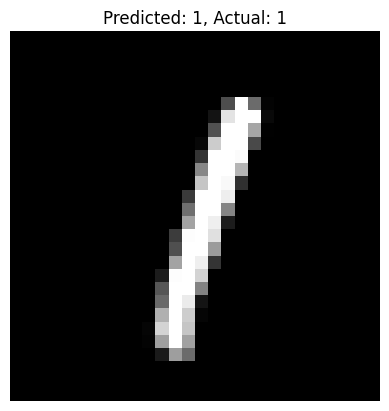

In [1]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

# Step 2: Load Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 3: Preprocess Data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# Step 4: Build the CNN Model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 digits (0 to 9)
])

# Step 5: Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Step 8: Predict and Show Example
predictions = model.predict(x_test)
import numpy as np

# Show one prediction
index = 5
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
plt.axis('off')
plt.show()
